In [2]:
#Samarth Borade
#C009
#BTI SEM 10
#EXP 6: Learning rate and optimizers

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, Adam, RMSprop
import matplotlib.pyplot as plt

# Step 1: Load the wheat seed dataset
data = pd.read_csv('seeds.csv')

# Step 2: Pre-processing and prepare the data
X = data.drop(columns=['Type'])  # Features
y = data['Type']  # Target

# Encoding species names using label encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into train and validate
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Building the sequential neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Step 4: Compile and fit the model to the training dataset
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                512       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2691 (10.51 KB)
Trainable params: 2691 (10.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:

# Step 5: Use different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
histories = []
for lr in learning_rates:
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])
    optimizer = SGD(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
    histories.append(history)


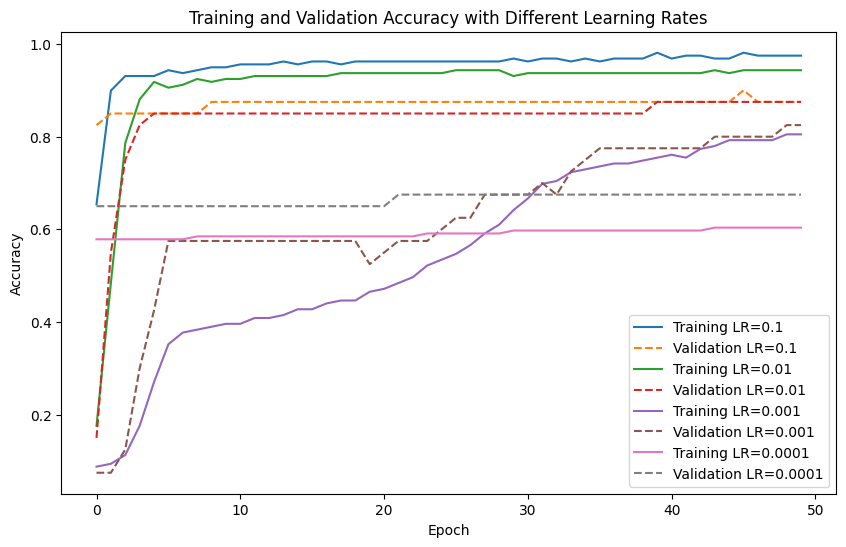

In [4]:

# Plot training and validation accuracy curves for different learning rates
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(histories[i].history['accuracy'], label=f'Training LR={lr}')
    plt.plot(histories[i].history['val_accuracy'], label=f'Validation LR={lr}', linestyle='--')
plt.title('Training and Validation Accuracy with Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
# Step 6: Use the best learning rate and add momentum to it
best_lr = 0.01  # Assuming you have identified the best learning rate from Step 5
momentum_values = [0, 0.5, 0.9, 0.99]
momentum_histories = []

for momentum in momentum_values:
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])
    optimizer = SGD(learning_rate=best_lr, momentum=momentum)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
    momentum_histories.append(history)

# Step 7: Add weight decay (equivalent to decay parameter) using L2 regularization
from tensorflow.keras import regularizers

decay_values = [1e-1, 1e-2, 1e-3, 1e-4]
decay_histories = []

for decay in decay_values:
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(decay)),
        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(decay)),
        Dense(3, activation='softmax')
    ])
    optimizer = LegacySGD(learning_rate=best_lr, momentum=0.9)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
    decay_histories.append(history)



# Step 8: Train the model using Adagrad, Adam, and RMSprop
optimizers = ['Adagrad', 'Adam', 'RMSprop']
optimizer_histories = []

for optimizer_name in optimizers:
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])
    if optimizer_name == 'Adagrad':
        optimizer = Adagrad(learning_rate=best_lr)
    elif optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=best_lr)
    elif optimizer_name == 'RMSprop':
        optimizer = RMSprop(learning_rate=best_lr)
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
    optimizer_histories.append(history)

# Analyzing the results
# You can compare the performance of different momentum values, decay values, and optimizers based on validation accuracy or other metrics.

# Concluding the best optimizer and learning rate
# Based on the analysis of validation accuracy or other relevant metrics, you can conclude which optimizer and learning rate work best for your model.


2024-02-09 16:24:52.043561: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


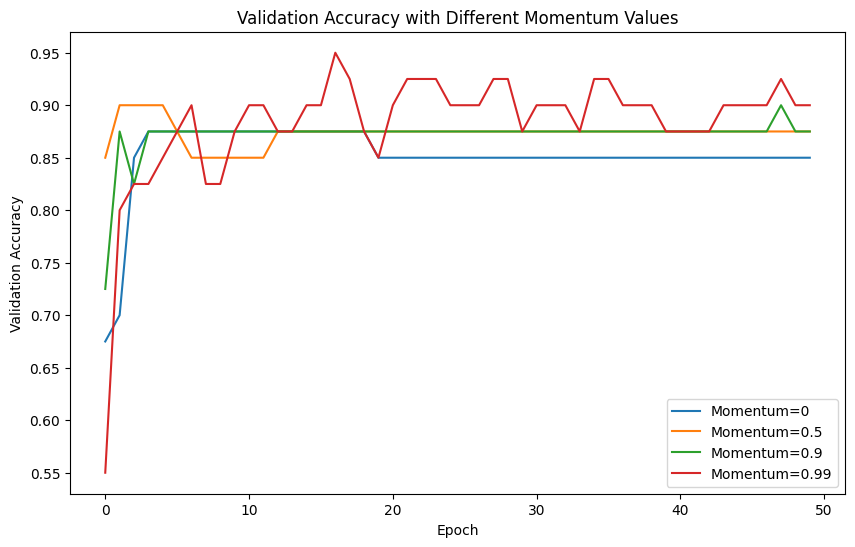

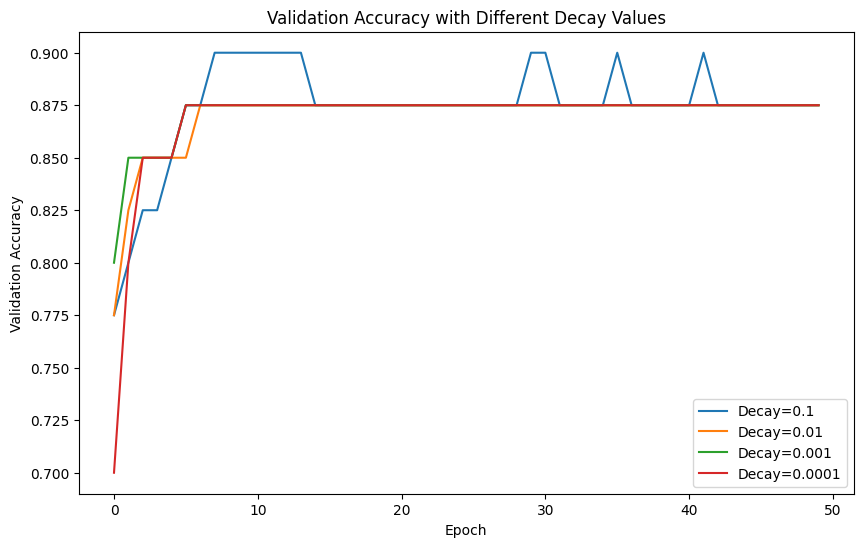

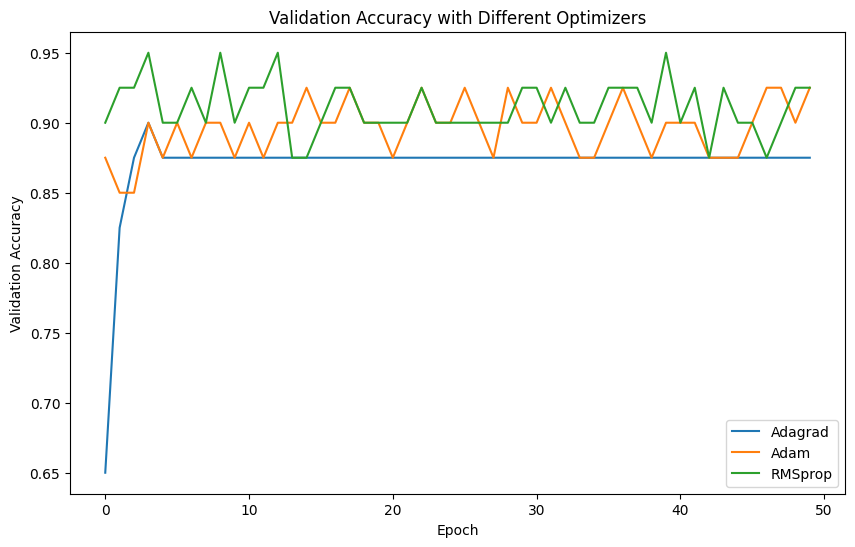

In [9]:
# Analyzing the results

# Compare the performance of different momentum values
plt.figure(figsize=(10, 6))
for i, momentum in enumerate(momentum_values):
    plt.plot(momentum_histories[i].history['val_accuracy'], label=f'Momentum={momentum}')
plt.title('Validation Accuracy with Different Momentum Values')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Compare the performance of different decay values
plt.figure(figsize=(10, 6))
for i, decay in enumerate(decay_values):
    plt.plot(decay_histories[i].history['val_accuracy'], label=f'Decay={decay}')
plt.title('Validation Accuracy with Different Decay Values')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Compare the performance of different optimizers
plt.figure(figsize=(10, 6))
for i, optimizer_name in enumerate(optimizers):
    plt.plot(optimizer_histories[i].history['val_accuracy'], label=optimizer_name)
plt.title('Validation Accuracy with Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Concluding the best optimizer and learning rate
# Based on the analysis of validation accuracy or other relevant metrics, you can conclude which optimizer and learning rate work best for your model.


In [10]:
# Comparing the maximum validation accuracy for each set of hyperparameters
max_acc_momentum = [max(history.history['val_accuracy']) for history in momentum_histories]
max_acc_decay = [max(history.history['val_accuracy']) for history in decay_histories]
max_acc_optimizers = [max(history.history['val_accuracy']) for history in optimizer_histories]

print("Maximum Validation Accuracy:")
print("Momentum Values:", max_acc_momentum)
print("Decay Values:", max_acc_decay)
print("Optimizers:", max_acc_optimizers)


Maximum Validation Accuracy:
Momentum Values: [0.875, 0.8999999761581421, 0.8999999761581421, 0.949999988079071]
Decay Values: [0.8999999761581421, 0.875, 0.875, 0.875]
Optimizers: [0.8999999761581421, 0.925000011920929, 0.949999988079071]
